In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset

df = pd.read_csv("MOCK_DATA.csv")
df.head()

,customer_id,age,income,purchase_history,customer_spending_score,freq_of_visit,gender,region,customer_type
0,1,59,29889,19524,59,75,Male,East,budget
1,2,43,105494,42714,66,43,Female,East,budget
2,3,47,107857,12129,61,23,Male,East,budget
3,4,31,113408,11521,74,71,Female,West,regular
4,5,31,95612,485,76,99,Agender,North,premium


In [9]:
df.columns

Index(['customer_id', 'age', 'income', 'purchase_history',
       'customer_spending_score', 'freq_of_visit', 'gender', 'region',
       'customer_type'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

In [11]:
col = ['age', 'income', 'purchase_history','customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']

In [12]:
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.show()

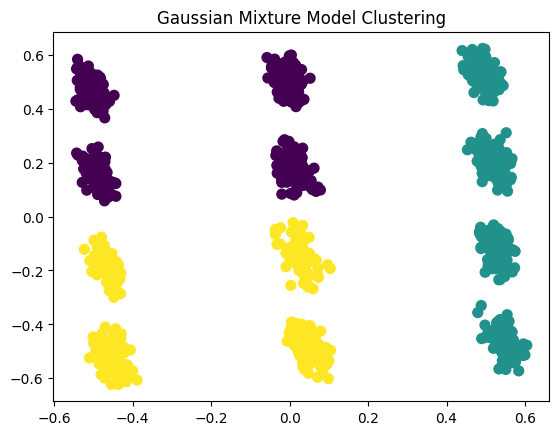

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler


X = df[col].values

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)


# Get the labels assigned by DBSCAN
plot_clusters(X_pca, gmm_labels, 'Gaussian Mixture Model')

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, gmm_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4587801450918175
